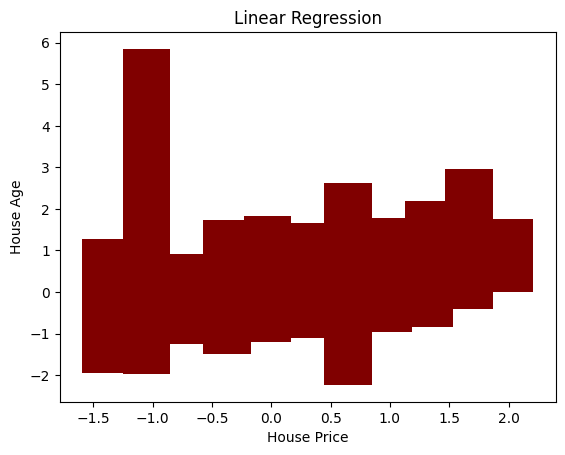

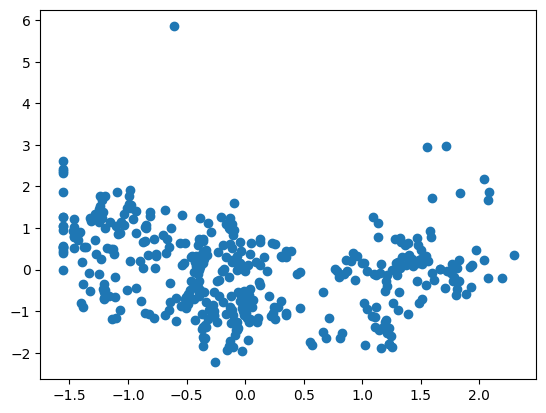

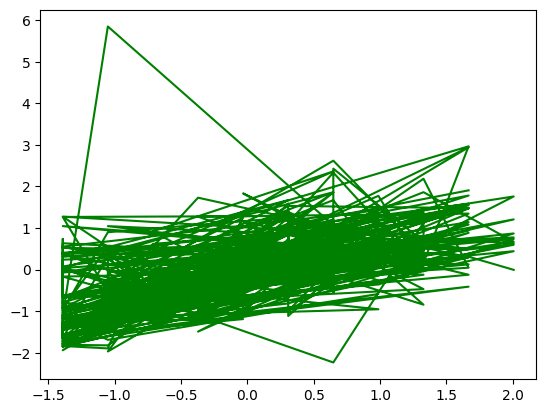

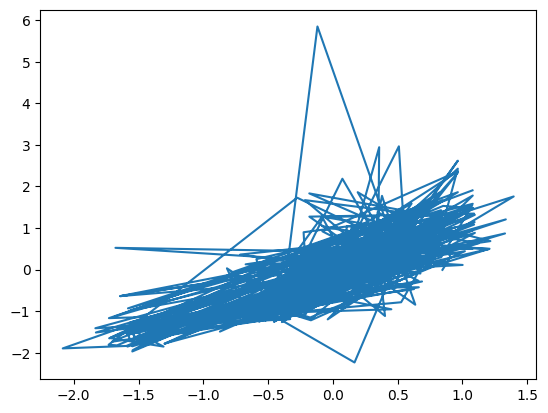

In [28]:
#code from scratch
import numpy as np
import pandas as pd
import matplotlib as mptlb
import matplotlib.pyplot as plt
import random as rn
d = pd.read_csv(r'Real_estate.csv')
d.head()
d.shape
hse_age = np.array(d['X2 house age'])
hse_age = (hse_age - np.mean(hse_age)) / np.std(hse_age)
cnv_stre = np.array(d['X4 number of convenience stores'])
cnv_stre = (cnv_stre - np.mean(cnv_stre)) / np.std(cnv_stre)
#to normalize the data
latt = np.array(d['X5 latitude'])
longt = np.array(d['X6 longitude'])
latt = (latt - np.mean(latt)) / np.std(latt)
longt = (longt - np.mean(longt)) / np.std(longt)
n = len(longt)

w1 = w2 = w3 = w4 = b = 0
y_price = np.array(d['Y house price of unit area'])
y_price = ((y_price) - np.mean(y_price)) / np.std(y_price)
y_pred = w1 * hse_age + w2 * cnv_stre + w3 * latt + w4 * longt + b
# to plot bar graph
plt.bar(cnv_stre, y_price, color ='maroon', width = 0.4)
 
plt.xlabel("House Price")
plt.ylabel("House Age")
plt.title("Linear Regression")
plt.show()
# to plot scatterplot
plt.scatter(hse_age, y_price)
plt.show()
plt.plot(cnv_stre, y_price, color = "green")
plt.show()
# gradient descent algorithm
alpha = 0.001
gng = []
for i in range(1000000):
    y_pred = w1 * hse_age + w2 * cnv_stre + w3 * latt + w4 * longt + b
    w1_derivative = (1 / n) * np.sum((y_pred - y_price) * hse_age)
    w2_derivative = (1 / n) * np.sum((y_pred - y_price) * cnv_stre)
    w3_derivative = (1 / n) * np.sum((y_pred - y_price) * latt)
    w4_derivative = (1 / n) * np.sum((y_pred - y_price) * longt)
    b_derivative = (1 / n) * np.sum(y_pred - y_price)
    k = (1 / ( 2 * n)) * np.sum((y_pred - y_price) ** 2)
    gng.append(k)
    
    w1 = w1 - alpha * w1_derivative
    w2 = w2 - alpha * w2_derivative
    w3 = w3 - w3_derivative
    w4 = w4 - w4_derivative
    b = b - b_derivative

plt.plot(y_pred, y_price)
plt.show()

In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_price, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))


The accuracy of our model is 53.471999999999994%


[ 0.84558466  0.90861573  0.8187329   0.8187329   0.76280071 -0.37222554
  0.29782823  0.58871922 -1.83283352 -0.45134128 -0.59036199  1.0814083
  0.16359826 -0.61018187  0.66086067 -0.08117204  0.96423733 -0.22844993
  0.59710208  0.75039878 -0.33208963  0.82254441 -0.49921857  0.83074634
 -0.26377366 -0.56005664  0.8610192   0.01055847  0.15798742  0.69267194
 -1.72816283  0.45105431 -0.64207805  0.62384641  0.90229899  0.52665369
 -0.59270354 -0.44385548  0.80319369  0.61574425 -1.52625114 -1.56186959
 -0.35992645  0.48877289  0.64806818  0.26650277  0.68609823 -0.27607719
 -1.73050101 -1.66600141  0.10867835 -0.72362155 -0.52923452  0.15744681
  0.61779473 -1.29798912  0.32310626  0.39123542 -1.68445578 -0.07395277
 -0.52018703  0.82412286 -0.57982937  0.65011866 -0.38343233  0.32650104
  0.59227466  0.34550379  0.29848544  0.83513678  1.07525684 -0.26787525
  0.40782617 -1.53035211  1.33437002 -0.45000693 -0.2278874  -0.64524877
 -0.48018474 -0.56568884  0.46147408 -0.07386954  0.

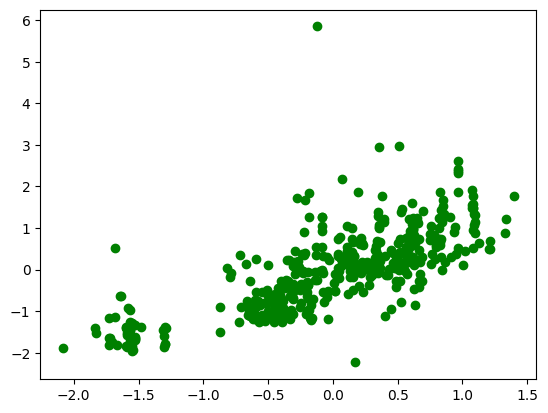

The accuracy of our model is 53.471999999999994%


In [55]:
# code from scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
gn = (hse_age, cnv_stre, latt, longt)
ng = pd.DataFrame.from_records(gn)
x = np.array(ng)
x = x.transpose()

x_train, x_test, y_train, y_test = train_test_split(x,y_price, test_size= 0.2)
Ln = LinearRegression()
Ln.fit(x, y_price)
y_pred= Ln.predict(x)
print(y_pred)
print(y_test)
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_price, color = "green")
plt.show()
from sklearn.metrics import r2_score
score = r2_score(y_price, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))